# Handwritten Digits - Project-1 - Tensorboard Introduction
- Tensorflow and Keras to create neural network
  - takes input output and layers details like
    - activcation fucntion
    - loss fucntion
    - accuracy metrics
- Confusion matrix between predcited and test
- plot using sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
#It tells the notebook to display matplotlib plots directly below the code cells that produce them, rather than in a separate window.
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist

## Loading Databaset using Keras
- Train and Split in Keras

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Each Image as 2D array of 28x28

len(x_train)
len(y_train)
len(x_test)
# X train and y_train are 2d arrays

### MNIST
- Handwritten digits data in 2D form
- 0 means black 255 means white

In [ ]:
print(len(x_train[0]))
print(x_train[0])
# This is 2D array

### See Image using Matplot
- plt.matshow(2D array)

In [ ]:
plt.matshow(x_train[100])
print(y_train[100])

### Flatten 2D array 28X28 into 1D array

In [ ]:
x_train.shape
# number of rows
# each rows is 2d array

In [ ]:
# Want (60000,784)
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

In [ ]:
x_train_flattened[0]
print(len(x_train_flattened[0]))

### Scaling the x_train data between 0 to 1
- Divide by 255

In [ ]:
x_train_flattened = x_train_flattened/255

In [ ]:
y_train[0:10]

## Keras to Create Neural Network
- want 784 as x1 x2 ... .x784 to connect with 10 ouputs 0 to 1
- acitvation function = sigmoid
- Then training using data yeh sab

- Single layer input and output for now

In [ ]:
# Dense(10): A fully connected layer with 10 neurons
# model = keras.Sequential([
#     keras.layers.Dense(10,input_shape=(784,),activation='softmax')
# ])

# If dont want to flatten image tell its 28*28
# Multiple layers hit and trial
model = keras.Sequential([
      # keras.layers.Flatten(input_shape=(28,28))
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


# optimizer backward going to optain weight attain global minima
# loss fucntion ouput and predicted difference used to attain weights
# Gradient decent and cost function

# metric when neural network compile goal is accuracy input output differtence
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
# epochs number of iteration the neural network going to train data
model.fit(x_train_flattened,y_train,epochs=5)

### Evaluating | Predicition Keral Model on Test Dataset

In [ ]:
model.evaluate(x_test_flattened,y_test)

In [ ]:
plt.matshow(x_test[50])

In [ ]:
y_predict= model.predict(x_test_flattened)
print(y_predict[50])
# This is 10 neurons output probability

In [ ]:
# Exact ouput based on 10 neurons
# np.argmax returns the index of the max probability, i.e., the predicted class.
print(np.argmax(y_predict[50]))

In [ ]:
y_test[49:52]

### Convert y_predicted into concrete class similar to y_test

In [ ]:
y_predicted_labels = np.argmax(y_predict, axis=1)

In [ ]:
y_predicted_labels[49:52]

## Building Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predicted_labels)
print(conf_matrix)

# confusion_matrix = tf.math.confusion.matrix(labels=y_test, predictions=y_predicted_labels)
# confusion_matrix

### Visualize using seaborn

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MNIST Confusion Matrix')
plt.show()

## Tensorboard
- Visualize tensorflow model accuracy loss etc

In [ ]:

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# Tensorboard callback
tf_callback= tf.keras.callbacks.TensorBoard(log_dir='/content/logs/',histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
# Tensorboard use in fit
model.fit(x_train_flattened,y_train,epochs=5,callbacks=[tf_callback])

### Visualize Tensorboard File

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/logs/

# Activation Functions
- Use Sigmoid at output layer = [probability 0,1]
- Between layers use tanh

- Not sure of activation Use Relu max(0,x)
- Leaky Relu max(01.x,x)

In [ ]:
import math

In [ ]:
# Sigmoid
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
sigmoid(-0)

In [ ]:
# tanh
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [ ]:
tanh(100)

In [ ]:
# RELU
def relu(x):
  return max(0,x)
def leaky_relu(x):
  return max(0.1*x,x)

In [ ]:
relu(0.5)
leaky_relu(-0.5)

# Gradient Descent in Neural
- Keras directly model leke train and fit
- get weights and bias after epochs
- Python simple implementation for x and y matrix to get weights

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

In [ ]:
x = df[['age','affordibility']]
x.head()
y= df['bought_insurance']
y.head()
x.shape

### Train and Test and Scaling Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)


#### Scaling Data Age / 100

In [ ]:

X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [ ]:
X_train_scaled.head()

## Model-1 Keras and Tensorflow

In [ ]:
# inputs to one output can use model from sklearn like logisitc but can be converted into
# neurals if written in this way

# Logistic Regression in Keras = Neural Network with:
# 1 Dense layer

# No hidden layers

# Sigmoid activation (for binary classification)

# Binary crossentropy loss

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

# since logistic regression hai loss fucntion is log loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=500)

### Evaluate the model

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
model.predict(X_test_scaled)

In [ ]:
X_test_scaled

In [ ]:
y_test

### Coeff and Bias from the model which was trained
- This means w1=5.060867, w2=1.4086502, bias =-2.9137027

In [ ]:
coef, intercept = model.get_weights()
coef, intercept

## Model-2 Using Python Done in Siddharsan Video
- Loss function know
- x y w1 w2 b and gradiet descent is know
- learning rate and number of iteration known

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5 #Learning rate fix
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,500, 0.4631)

In [ ]:
coef, intercept

# Neural Network Implement Python
- want fit, predict functions like models have inbuild

In [ ]:
class my_neural_network():
  def __init__(self):
    self.w1 = 1
    self.w2=1
    self.bias=0

  def gradient_descent(self,age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5 #Learning rate fix
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = self.sigmoid_numpy(weighted_sum)
        loss = self.log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d
        if i%10==0:
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

  def fit(self, x, y, epochs, loss_threshold):
    self.w1 , self.w2, self.bias =self.gradient_descent(x['age'],x['affordibility'],y, epochs, loss_threshold)

  def log_loss(self,y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

  def sigmoid_numpy(self,X):
   return 1/(1+np.exp(-X))

  def predict(self,x_test):
    weighted_sum = self.w1*x_test['age'] + self.w2*x_test['affordibility'] + self.bias
    return self.sigmoid_numpy(weighted_sum)

In [ ]:
customModel= my_neural_network()
customModel.fit(X_train_scaled,y_train,epochs=100,loss_threshold=0.4631)

In [ ]:
customModel.predict(X_test_scaled)

# Gradien Descent Types
- Bathc Gradient Descent
  - All data points for every epoch goes through and calculate loss and adjust weight like we did before
  - Problem 10millions rows and 5000 featutes then too much computation
  - Good for small data
- Stochastic Gradient
  - use one(randomply picked) - loss y predict and adjust weight on every epochs
  - good for high data
- Mini Batch
  - Similar to stochatic
  - instead of one data use batch of some data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

### Preprocessing data - Standard Scaler

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x= df.drop('price',axis=1)
y= df['price']
scaled_X = sx.fit_transform(x)
scaled_y = sy.fit_transform(y.values.reshape(-1,1))
# -1 all rows and 1 means one column (rows,feature)
scaled_X
scaled_y

In [ ]:
# Convert y to single array again
scaled_y = scaled_y.flatten()
scaled_y

In [ ]:
np.ones(shape=(2,2))

### Batch Descent Gradient
- use all data point of x to go through weights and bias
- since our data is continuos
- cost function is mean squared error
- dJ/dw and dJ/db
  - w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
  - b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        

In [ ]:

number_of_features = scaled_X.shape[1]
print(scaled_X.T.shape)
  # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
w = np.ones(shape=(number_of_features))
w.shape
w

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))  # 1Xfeautures
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

#### Predict Values using this model weight and bias

In [ ]:
check = sx.transform([[2400, 4]])[0]
check
# array([[0.55172414, 0.75      ]])
# need first array

price = w[0] * check[0] + w[1] * check[1] + b
price

In [ ]:
# from sklearn import preprocessing
# sx = preprocessing.MinMaxScaler()
# sy = preprocessing.MinMaxScaler()
# used for training and standarisation

def predict(area,bedrooms,w,b):

    scaled_X = sx.transform([[area, bedrooms]])[0]
    # pass array of 2d return array of 2d need firrst element

    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(1056,2,w,b)
# w and b from gradient descent

### Stochastic Descent Gradient
- one random sample each epochs

In [ ]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6)


# scaled_y.reshape(scaled_y.shape[0],)

#2d array (20, 1) needed for tranformation
scaled_y.shape

# convert to single array (20,)
a= scaled_y.reshape(scaled_y.shape[0],)
a.shape

number_of_features = scaled_X.shape[1]
w = np.ones(shape=(number_of_features))
sample_x = scaled_X[3]

c= np.dot(w, sample_x.T)
c

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        # here randomly one sample le rahe
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        # Both sample y and y_predicted is single float value
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(1000,2,w_sgd, b_sgd)

### Mini-Batch Gradient Descent
- Batch of 20 samples aise lo

In [ ]:
random_indices= np.random.permutation(20)
X_tmp = scaled_X[random_indices]
X_tmp
y_tmp = scaled_y.reshape(scaled_y.shape[0],)[random_indices]
y_tmp

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

# GPU bench-marking with image classification PROJECT-2
- CIFAR-10 dataset -

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [ ]:
# Get GPU information on you computer
tf.config.experimental.list_physical_devices()

In [ ]:
tf.__version__

In [ ]:
# Means for Deep Learning can use GPU
tf.test.is_built_with_cuda()

## Dataset
- Keras
  - CIFAR-10 dataset - 60k images 10classes
    - airplance, bird, cat, dog, horse
  - Use Artifical Neural Network ANN
  - Colourful images is made of [Red, Green, Blue] array
  - Like handdigit project uses [white and black]

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape # (50000, 32, 32, 3)
X_train[0][31][30]
# ndarray (32, 32, 3)
# each image is 32 rows 32 columns and each pixel is [R G B] value
# 0 to 255 values for each R G B

In [ ]:
plt.figsize=(10,1)
plt.imshow(X_train[4])

In [ ]:
# Y already into 10 classes
y_train.shape #(50000, 1) 2d array hai single column
y_train[0]
y_train[0][0]

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[0][0]]
# Index from y_train mapped to correct name

## Normaling x_train data
- divide by 255

In [ ]:
x_train_scaled = X_train / 255
x_test_scaled = X_test /255

In [ ]:
x_train_scaled.shape

## One hot encoding
- y_train ko 10 classes mein each row ko convert
- array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
y_train[:3]

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [ ]:
# Converting each y value into array of categories
y_train_categorical[0:5]

## Model- Training and Prediciton
- need to flatten data like we did in digit recognistion
- 28*28 one iamge convert into 784 xi values
- similar here 32 32 3 one image represent
- Hidden layer PREFERD Relu used
- Classification output sigmoid or sigmoid use

In [ ]:
# Ouput layer has 10 classes
# Activation signmoidn as it is good with classificaltion
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
# Hidden layer PREFERD Relu used

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

# Since my y_train_categorcial data
# y_train_cateogrical [[0,0,0,1],[1,0,0,]] categories distributed
# Use categorical_crossentropy
# In Handwrittten digit y_train was [1,2,3,4]
# SO used sparse_categoriacal

model.fit(x_train_scaled, y_train_categorical, epochs=1)



# If y_train is not categorized same way as in Handdigit
# model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
# model.fit(x_train_scaled, y_train, epochs=1)

### Prediction

In [ ]:
np.argmax(model.predict(x_test_scaled)[0])

In [ ]:
y_test[0]

## Measure training time on a CPU

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
tf.config.experimental.list_physical_devices()
# [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

# return. 3.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

# Customer Churn Project-3 Using ANN
- Measure how many customers are leaving the business
- why customers are leaving the business
- Telco Customer Churn Data from Kaggle

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/CustomerChurn.csv")
df.sample(5)

In [ ]:
df.shape

## Data Exploration
- customerId is useless
- All unique values - 1 and 0 convert
- if column has 3,4 unique values create dummies column
- Float values need to be scaled MinMax StandardScaler

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes

Total Charges is object
Monthly Charges is Number


In [ ]:
df.TotalCharges.values
# String convert into number

In [ ]:
df.MonthlyCharges.values

In [ ]:
df.isnull().sum()

In [ ]:
pd.to_numeric(df['TotalCharges'])
# Creating problem as some places ' ' is present remove them

Finding Total Charges Blank

In [ ]:
invalid_total_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

In [ ]:
invalid_total_charges.shape

Removing and updating the df

In [ ]:
# df1= df[df.TotalCharges != ' ']
# df1.shape
# Or
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()]
df.shape

Converting Object to String now

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [ ]:
df['TotalCharges'].dtypes

## Histogram Visualization
- Tenure x axis
- y axis count using Churn i.e. leaving

In [ ]:
((df['Churn'] == 'No') & (df['tenure'] >= 70)).sum()

In [ ]:
tenure_churn_no = df[df['Churn'] == 'No'].tenure
tenure_churn_yes = df[df['Churn'] == 'Yes'].tenure
plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of customer")

Monthly charges

In [ ]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Label Encoding
Columns with Yes and No

In [ ]:
df['gender'].unique()

In [ ]:
# for column in df actually iterates over column names (i.e., strings), not rows
# df is a pandas DataFrame, not a basic array.

for column in df:
  if df[column].dtypes=='object':
    print({column}, df[column].unique())

Replacing Values with Yes and No Then converting into numbers

In [ ]:
columns_to_clean = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in columns_to_clean:
    df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines']= df['MultipleLines'].replace('No phone service', 'No')
df['StreamingTV'].unique()

In [ ]:
for column in df:
  if df[column].dtypes=='object':
    print({column}, df[column].unique())

Replace Yes and No with 1 and 0

In [ ]:
yes_no_columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})

In [ ]:
for col in df:
  print(col,df[col].unique())

Gender Male=0 Female=1

In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

## One Hot Encoding for categorical columns
- Columns InternetServi ce has three object
- Create 3 columns InternetService1,2,3 with value 1,0
- pd.get_dummies()

In [ ]:
df1 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df1.columns

In [ ]:
df1.head()

In [ ]:
df1.dtypes

## Tenure, Monthly Charges and TotalCharges need scaling

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

## Model Training and Testing

In [ ]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Build ANN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    # keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    # output is 1 and 0 toh probability dega using sigmoid
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

# output is 0 and 1 binary_crossentropy categorical
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
yp = model.predict(X_test)
yp[:5]

In [ ]:
y_test[:5]

In [ ]:
# output is 1 and 0 toh probability dega using sigmoid
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:5]

### Confusion Metrics and Precision F-1 Call

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Handling Imbalanced Dataset - Customer Churn Project
- Due to imbalance in customer churn f-1 score is low for 0 and 1 case
- Examples
  - customer churn ,cancer prediction, device failure

## Techniques
1. Undersampling majority class 900 F 100 R
  - Pick random 100 F and 100 R
2. Oversampling
  - Duplicate 100*9 R 900R and 900F
3. SMOTE - Synthetic minority element ka over-sampling tecnique
  - generate examples using k nearest neighbors algo
  - 100*9 R 900R and 900F
  - use library imblearn.over_sampling import
  SMOTE
4. Ensemble Method Avg Lena Divide Karke
  - 900 F -> Divide 300 300 300 Take 100 F and 100 R combo 1, 2 ,3
  - Final result avg/ majority vote of all three
5. Focal Loss
  - penalize to majority class and more weight to minorty class

You can see that by using dropout layer test accuracy increased from 0.77 to 0.81

In [ ]:
# df1 is the final dataframe after data processing
df1.Churn.value_counts()
# Churn
# 0	5163
# 1	1869

In [ ]:
df1.columns

BUILD ANN MODEL Function to be used by all methods

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

## 1- Undersampling

In [ ]:
# Same amount of zero and ones
class_0_count, class_1_count= df1.Churn.value_counts()
class_0_count, class_1_count

In [ ]:
df_class_0 = df1[df1['Churn']==0]
df_class_1 = df1[df1['Churn']==1]

In [ ]:
df_class_0.shape

In [ ]:
df_class_1.shape

Class 0 se sample collect of size class 1

In [ ]:
df_class_0_sameas1= df_class_0.sample(class_1_count)
df_class_0_sameas1.shape

In [ ]:
# combine to create a new df
df_underfitting = pd.concat([df_class_0_sameas1,df_class_1])
df_underfitting.shape

In [ ]:
df_underfitting['Churn'].value_counts()
# Churn
# 0	1869
# 1	1869


### Model Training using this df_underfitting

In [ ]:
X = df_underfitting.drop('Churn',axis='columns')
y = df_underfitting['Churn']

#Stratity y meand y_train  and y_test equal number of 0 and 1 divide
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()
# 0	1495
# 1	1495

In [ ]:
y_test.value_counts()

# 1	374
# 0	374


In [ ]:
y_preds_undersampling = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
# f1 score for 0 and 1 imporved now

## 2- Oversampling

In [ ]:
# Same amount of zero and ones
class_0_count, class_1_count= df1.Churn.value_counts()
class_0_count, class_1_count
df_class_0 = df1[df1['Churn']==0]
df_class_1 = df1[df1['Churn']==1]

In [ ]:
# Duplicate the class1 to equal to class0 number
# Blindly duplicating the values from df_class1
df_class1_oversample=df_class_1.sample(class_0_count,replace=True)
df_class1_oversample.shape

In [ ]:
# join and one data frame
df_oversample = pd.concat([df_class1_oversample,df_class_0])
df_oversample.shape

In [ ]:
df_oversample['Churn'].value_counts()

In [ ]:
X = df_oversample.drop('Churn',axis='columns')
y = df_oversample['Churn']

#Stratity y meand y_train  and y_test equal number of 0 and 1 divide
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()
# 0	1495
# 1	1495

In [ ]:
y_test.value_counts()

# 1	374
# 0	374


In [ ]:
y_preds_oversampling = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
# f1 score for 0 and 1 imporved now

## 3- SOMET
- Instead blindly duplicating values in class-1
- use k mean neighbour algo

In [ ]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [ ]:
y.value_counts()
# 0	5163
# 1	1869

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# now y ka minority 1 is equal to 0
# not blindly duplicated used k mean insternally for those rows
y_sm.value_counts()

New x and y are ready now do train split and build model

## 4- Ensemble with undersampling
- decrease majority 0 to number of minority 1
- use majority vote from multiple division

In [ ]:
df1.Churn.value_counts()

In [ ]:
# Regain Original features and labels
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

Training data need to be divided and Test can remain same

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()
# 0	4130
# 1	1495

# need 1st split 0:1495 1495 2nd 1496:1496+1495 1495
# Train in 3 data split of majority

In [ ]:
df2= X_train
df2['Churn']=y_train
df2.shape
df2.head()

In [ ]:
df2['Churn'].value_counts()

In [ ]:
df2_class0 = df2[df2['Churn']==0]
df2_class1 = df2[df2['Churn']==1]

In [ ]:
df2_class0.shape,df2_class1.shape
# ((4130, 27), (1495, 27))

In [ ]:
df_train_divide1 = pd.concat([df2_class0[0:1495],df2_class1])
df_train_divide1.shape

In [ ]:
df_train_divide1['Churn'].value_counts()

Create A fucntion to create a batch

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

Prediction 1: First Division used as training

In [ ]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Prediction 2: Second Division used as training

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Prediction 3: Third Division used as training

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [ ]:
len(X_test)
y_pred1[0]

Trained the model- YPred
- xtrain and ytrain divided equal distribution wala
- Net ypred -> majority of 1 2 3

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

#  Final report based on y_test and y_prediction_ensemble

# Dropout Regularisation Project-4 Sonar Mine Detection
- dealing with overfit and underfit problem
- neural network tends to overfit when eopchs are high
- training sample 1 -> drop 50% neurons from hidden layers

### Dropout helps in overfiting
- dropping helps neurons dont be biased with some feature kyuki woh kabhi bhi randomly drop ho sakte
- can;t rely on one input as it might be droipout randomly
- neurons will not learn redundant detials of input

## Dataset - Connectionist Bench Solar Mines Vs Rocks
- binary classification problem

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/sonar_dataset.csv", header=None)
# header none since this data dont have column name so indexing
df.sample(5)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
df[60].unique()

In [ ]:
df[60].value_counts()

### x and y

In [ ]:
x= df.drop(60,axis=1)
y= df[60]
x

In [ ]:
y

### Label Encoding y
- M = 1
- R = 0

OR
### Dummies create Y-> R and M column mein
- y = pd.get_dummies(y, drop_first=True) ek hi columns R naam ka bacha
- y.sample(5) # R --> 1 and M --> 0

In [ ]:
y = y.map({'R': 0, 'M': 1})

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
X_train.head()

In [ ]:
X_train.shape

## Deep Learning Model
- Use sigmoid + binary_crossentropy when the output is one unit (1 neuron) with 0/1 label.
- One hot ouput
  -  labels are one-hot encoded (e.g., [1, 0] or [0, 1]), you'd need:
  - 2 output units  softmax activation categorical_crossentropy loss
  - keras.layers.Dense(2, activation='softmax')  # 2 output units for one-hot

#### Method-1 Model without Dropout Layer

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# binary ouput sigmoid
# error loss = binary_crossenetr

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# batch size randomly 8 samples
model.fit(X_train, y_train, epochs=100, batch_size=8)

In [ ]:
# Overfit training time accuracy 1 but here problem
model.evaluate(X_test, y_test)

In [ ]:
pred = model.predict(X_test)
print(pred,pred.shape)
y_pred= pred.reshape(-1)
#  (52, 1) to single array convert
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])
print(y_test[:10])

##### Confusion matrix and report y true and predicted

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

#### Method-2 Model with Dropout Layer


In [ ]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    # Declaring dropout for each epcoh
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

In [ ]:
modeld.evaluate(X_test, y_test)
# Test set accuracy improved

In [ ]:
y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

# Computer Vision
- Area of computer science dealing with image classification, object detection
- Image Classification - > phone peoples category into classes
- Image classification with localization -> image category + their location(drawing boxes) -> this is called object detection
- Object Detection -> Drawing Boxes
  - Passbook extract information
  - Agriculture Crop/Pest Analysize
  - Autonomous Cars
- Possible due to neural network training acha ho raha now
- Image Segmentation -> Pixel differentiate
  - image category then particular image pixels belong to which object

#### Datasets for Computer Vision
- imagenet -> labels images dog cat , with bounding images object detection
- coco -> image segmented
  - position detection standing sitiing
- google open images
- tensorflow hub - pretrained models

## Convolutional Neural Network
- ANN
  - earlier ANN images array break (100,100,3) then we need 30000 neurons in first layer computation is very high
  - Too much complexity
  - Treats local pixels same as pixels far apart
  - Sensitive to location of an image = array changes values


## Image Classification using CNN- CIFAR10 dataset
  - y = one hot encoded [0 0 0 1] instead of 4 use categorical_crossentropy
  - y= simple value 9   use sparse_categorical_crossentropy
  - y = 0/1 use binary crossentropy

- With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# Keras has data, layers for models everything
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

In [ ]:
y_train[0]
# ouput is from 0 to 9
# unique, counts = np.unique(y_train, return_counts=True)
# value_counts = dict(zip(unique, counts))
# print(value_counts)

In [ ]:
y_train.shape
# 2D array

In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train.shape
y_train[:5]

In [ ]:
X_train[0]
# (32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
plt.imshow(X_train[1])

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(2,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(X_train,y_train,3)

Normalize x_train since pixel 0 to 255 value RGB

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

#### ANN Model vs CNN Model Comparision

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=1)


# y = one hot encoded [0 0 0 1] use categorical_crossentropy
# y= simple value 9   use sparse_categorical_crossentropy
# y = 0/1 use binary crossentropy

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
print(y_pred,y_pred.shape)
# y_pred 10 classes total ka probability lega
y_pred_classes = [np.argmax(element) for element in y_pred]
# indexes of highest probability in each element
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

CNN Method -> Keras provide
- Layer1 Convolution Relu Pooling
- Layer2 Again same
- Layer 3 Goes to ANN neurons Dense Layer

In [ ]:
cnn = models.Sequential([
    # cnn automatically creates filters jaise 9-> upper cirle, lower cuver etc khud pata kar lega
    # img-> Convolution: number of filter, each filter size, and activatoion function
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),

    # Pooling to reduce dimension 2X2 box mein max value to 1 value
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # now after cnn pass to ann type with flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=1)

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
print(classes[np.argmax(y_pred[30])])

In [ ]:
plot_sample(X_test, y_test,30)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Difference between sigmoid and softmax actication fucntion
- Sigmoid ouput
1: 0.45
2: 0.67

-Softmax ouput
1: 0.45/(0.45/0.67)
2: 0.67/(0.45/0.67)

So total sum of probability is 1 in softmax

# Data Augmentation | Flower Detection Project-6
- CNN automatically not able to scale and rotate
  - Train with samples orgiianl but once rotated image diye problem
- Data augmentation
  - original image -> rotate, flip, different types create new image
  - now use these multiple images to train
  - now test data if get rotated image no problem


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# helps convert image into numpy array needed for training
# cv2.imread(path of image)
# cv2.resize into pixels 100*100
import os
# opertaing system fucntion laata
import PIL
# open images yeh sab
# Pyhton library to work with images
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/Photos', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

Playaround with photos inside directory
- use pathlib: listing images with .jpg these things

In [ ]:
data_dir

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
#PosixPath('/content/Photos/datasets/flower_photos')

In [ ]:
data_dir = data_dir / 'flower_photos'
# going to actual folder where flowers are present

In [ ]:
print(os.path.exists(data_dir))  # Should return True
print(os.listdir(data_dir))

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]
 # No subfolder match
# Can perform listing using data_dir path
len(list(data_dir.glob('*/*.jpg')))

GET Roses images use glob->comes under pathlib

data_dir= /content/Photos/datasets/flower_photos/flower_photos

now inside this directory use glob function

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

### Open image in pyhton using PIL

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
tulip[:5]
PIL.Image.open(str(tulip[1]))

Images Dictionary All Images of Differnet Types

In [ ]:
# Complete Data of images with label unka path hai apne paas
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [ ]:
PIL.Image.open(str(flowers_images_dict['roses'][100]))

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

### CV2 convert image into numpy array

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [ ]:
img.shape

In [ ]:
type(img)

Dimensions Same resize karo

In [ ]:
img_resized= cv2.resize(img,(100,100))
img_resized

### Prepare x and y

In [ ]:
x,y = [],[]
# x=[rose1,rose2,tulip2,tulip2]
# y=[0,0,1,1]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
x= np.array(x)
y=np.array(y)

In [ ]:
x.shape

In [ ]:
y.shape

### Model Training using CNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

Scaling Images 255 RGB

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build ANN Model

In [ ]:
num_classes = 5

model = Sequential([
    # 16 is no. of filter and 3*3 is filter size
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(180, 180, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
prediction_classes= [np.argmax(element) for element in predictions]
prediction_classes[0]

Convert Final output y prection into softmax i.e. a/a+b+c+d+e bas aise hi

In [ ]:
# Normal array of probability convert into softman
score = tf.nn.softmax(predictions[0])
score

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

### Data Augmentation
- img hai numpy and can display
- convert rotate, zoom, flip on that img generate new image

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomZoom(0.5)
    ]
)

In [ ]:
plt.imshow(x[0])

In [ ]:
augmented_images_x=data_augmentation(x)

In [ ]:
plt.axis('off')
plt.imshow(augmented_images_x[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer
- create keras layer of data augmentation

In [ ]:
x[0]

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
    # x_train- > data_augment -> those new_x_train->further layer to train
    # use all the layers defined above and use those images for training too
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# first layer data augmentation jo banaya
model.fit(X_train_scaled, y_train, epochs=1)

In [ ]:
model.evaluate(X_test_scaled,y_test)

# Transfer Learning
- Use PRetrained model which is made by solving one problem
- use to solve another problem
- Tensorflow Hub : Saves computation

## Model we use:
- Mobilenet V2 model TensflowHub -> google trained 1000 classes fish, animals, flowers
- freeze layers of mobilenet toh weights directly unka use kar liye
- can add our own some layer-> GET OUR OWN FLOWER Classficiation-> 5 classes 5 types of flower

- can omit last layer of pretrained model and add our layer:
- last layer generally is signmoid softmax type



In [16]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
# to download model mobilenet

from tensorflow import keras
from keras import Input, Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
print("TensorFlow version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TensorFlow version: 2.18.0
TF Hub version: 0.16.1


Create the model instance
- download the model .pd
- use online url
- give your input layer to the model and create ouput

In [45]:
IMAGE_SHAPE = (128, 128)
# Given on website what type of image they used for training

# Method-1 Using online given model
# classifier = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
# ])



# Method-2 Download the models .pb file and use it
# Define input shape expected by your model
inputs = Input(shape=(128, 128, 3))  # or whatever the model expects

# Wrap SavedModel as a layer
mobilenet_layer = keras.layers.TFSMLayer("/content/mobilenet", call_endpoint="serving_default")

# Use it in a Keras model
outputs = mobilenet_layer(inputs)
model = Model(inputs, outputs)


In [46]:
IMAGE_SHAPE+(3,)

(128, 128, 3)

https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
- Classes this model is trained on
- labels = ["background", "tench", "goldfish", "great white shark", "tiger shark", "hammerhead", "electric ray", "stingray", "cock", "hen", "ostrich", "brambling", "goldfinch", "house finch", "junco", "indigo bunting", "robin", "bulbul", "jay", "magpie", "chickadee", "water ouzel", "kite", "bald eagle", "vulture" , etc]


### Check the model using one class image

In [47]:
gold_fish=Image.open('/content/goldfish (1).jpg').resize(IMAGE_SHAPE)
gold_fish.show()
# If it looks blank/gray: the image is corrupted or invalid.

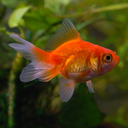

In [48]:
gold_fish = gold_fish.convert('RGB')
gold_fish

array([[[ 76,  90,  22],
        [ 90, 108,  31],
        [ 99, 124,  42],
        ...,
        [ 82, 100,   0],
        [ 83,  99,   1],
        [ 80,  95,   0]],

       [[ 75,  88,  24],
        [ 90, 106,  35],
        [101, 124,  49],
        ...,
        [ 80,  98,   2],
        [ 80,  96,   1],
        [ 77,  92,   1]],

       [[ 71,  80,  29],
        [ 84,  98,  37],
        [ 93, 116,  48],
        ...,
        [ 84, 104,   7],
        [ 85, 103,   6],
        [ 86, 100,   7]],

       ...,

       [[ 11,  23,   7],
        [ 12,  24,   5],
        [ 14,  25,   6],
        ...,
        [ 49,  62,  10],
        [ 49,  63,  10],
        [ 51,  62,  11]],

       [[ 13,  28,   5],
        [ 14,  31,   6],
        [ 17,  30,   7],
        ...,
        [ 41,  52,   9],
        [ 40,  57,  10],
        [ 41,  58,   9]],

       [[ 17,  36,   4],
        [ 15,  36,   4],
        [ 17,  32,   6],
        ...,
        [ 32,  45,  12],
        [ 32,  48,  12],
        [ 32,  50,  10]]], dtype=uint8)
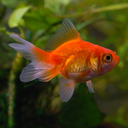

In [49]:
np.array(gold_fish)

Normalize the image /255

In [50]:
gold_fish= np.array(gold_fish)/255.0
gold_fish.shape

(128, 128, 3)

### Prediction of a model
- accepts multiple images as input
- dimension (number of images, each image dimension)
- for one image need to add one dimension
  - gold_fish[np.newaxis, ...]
  - (1, 224,224,3) means one image to prediction function

In [51]:
gold_fish_with_correct_prediction_dimension=gold_fish[np.newaxis, ...]

In [52]:
gold_fish_with_correct_prediction_dimension.shape

(1, 128, 128, 3)

Prediciton with model

In [58]:
result = model.predict(gold_fish_with_correct_prediction_dimension)
type(result['logits'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


numpy.ndarray

In [59]:
result['logits']
# 1001 classes probability

array([[ 0.5140054 ,  2.8574958 , 12.258903  , ...,  1.9390174 ,
        -0.45755064,  0.0312461 ]], dtype=float32)

In [60]:
predicted_index= np.argmax(result['logits'])
predicted_index

np.int64(2)

### Image label/classes given on website as .txt

In [61]:
image_labels=[]
with open("/content/ImageNetLabels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[:5]
# ['background', 'tench', 'goldfish',
#  so index 2 is goldfish

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

## Now take pre-trained model and retrain it using flowers images
- since flower data has ouput
  - roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
  - these are not in 1001 classes of pretrained model
  - remove the last layer and add Dense layer with 5 output
- Model aate hai feature vector name- Last layer removed hota hai

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
    # adding a dense layer in the end of the feaure model
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Flowers data wala code again X and Y create Same as above

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)

# Sliding Window Object Detection
How Boxes are Draw
- whether a dog and a person
- try different sizes iteratively -> rectangle
- box of some size slides in complete image
- eahc time cnn se ask is this dog-> YES correct box

#### Sliding Window Object Detection -> R CNN -> Fast R CNN -> Faster R CNN
 #### Nowayas YOLO You only look once
 - R CNN means one boundary rectangle and lside the box to detect image
 - problem too much computation for each image

# YOLO Algo Object Detection
- Boxes on images detection
- standard way of detecting object in computer vision
- History:
  - Yolov1 2016 video frames work

## Pretrained Model Use Object Detection
- Coco Dataset
- Github repo YOLOv4 and its setup for object detection